<a href="https://colab.research.google.com/github/felippedamasoade/Deep_Learning_CV/blob/main/DEEP_LEARNing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [6]:
data = pd.read_csv('/content/Base_Aleat_ria_de_500_Registros.csv')

In [7]:
data.head()

,Data,Dia da Semana,Operador,PDV,Oferta/Departamento,Valor Tabela,Valor Vendido,% Desconto,% Lucro,Qtde. Vendida,Qtde. Devolvida,Ticket Médio,Valor Imposto,Cancelamentos
0,23/01/2024,Tuesday,Maria Eduarda,PDV 50,Ação Escova Belliz,210.11,175.49,4.23,21.83,4,0,52.42,22.80,0
1,05/01/2024,Friday,Maria Eduarda,PDV 50,Ação Escova Belliz,226.30,227.19,4.41,24.58,5,0,43.47,16.50,0
2,26/01/2024,Friday,Maria Eduarda,PDV 52,Ação Escova Belliz,228.16,222.75,4.53,22.49,5,0,42.49,22.40,0
3,13/01/2024,Saturday,Lays Silva,PDV 52,Cosméticos,240.93,171.58,4.69,25.22,5,0,33.62,24.39,0
4,14/01/2024,Sunday,Maria dos Anjos,PDV 50,Cosméticos,220.35,234.89,3.46,23.40,6,0,36.23,19.40,0


In [22]:
# Importar as bibliotecas necessárias
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pandas as pd

# ---- 1. Pré-processamento dos Dados ----
# Separar variáveis categóricas e numéricas
categorical_columns = ['Operador', 'PDV', 'Oferta/Departamento']
numerical_columns = ['Valor Tabela', 'Valor Vendido', '% Desconto', '% Lucro',
                     'Qtde. Vendida', 'Qtde. Devolvida', 'Ticket Médio', 'Valor Imposto']

# Pré-processador para normalizar dados numéricos e codificar categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Aplicar pré-processamento
X = preprocessor.fit_transform(data)

# Dividir os dados mantendo os índices originais
X_train, X_val, train_indices, val_indices = train_test_split(
    X, data.index, test_size=0.3, random_state=42, stratify=data['Dia da Semana']
)

# ---- 2. Construção do Modelo Autoencoder ----
# Definir o tamanho da entrada com base nos dados
input_dim = X_train.shape[1]

# Construção do Autoencoder
input_layer = Input(shape=(input_dim,))
# Codificador
encoder = Dense(12, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
encoder = Dense(4, activation="relu")(encoder)
# Decodificador
decoder = Dense(8, activation="relu")(encoder)
decoder = Dense(12, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Modelo completo
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Treinamento do Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=500,
    batch_size=16,
    validation_data=(X_val, X_val),
    shuffle=True,
    verbose=1
)

# ---- 3. Detecção de Anomalias ----
# Fazer previsões com o autoencoder
predictions = autoencoder.predict(X_val)

# Calcular o erro de reconstrução
reconstruction_error = np.mean(np.power(X_val - predictions, 2), axis=1)

# Definir limiar com base no percentil 95
threshold = np.percentile(reconstruction_error, 95)

# Identificar registros anômalos
anomalies = reconstruction_error > threshold

# Usar os índices originais para mapear as anomalias de volta para a base original
anomalous_data = data.iloc[val_indices[anomalies]]

# ---- 4. Exibir os Registros Anômalos ----
print("Registros Anômalos Detectados:")
print(anomalous_data)


Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1787 - val_loss: 0.1778
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1743 - val_loss: 0.1720
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1695 - val_loss: 0.1637
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1592 - val_loss: 0.1540
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1498 - val_loss: 0.1467
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1411 - val_loss: 0.1424
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1382 - val_loss: 0.1393
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1358 - val_loss: 0.1371
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1327 - val_loss: 0.1356
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1342 - val_loss: 0.1347
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1321 - val_loss: 0.1338
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

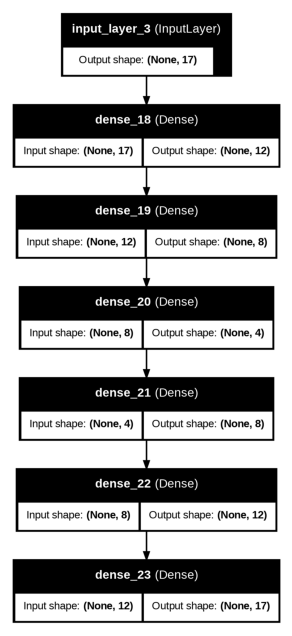

In [24]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Salvar o diagrama da rede neural em um arquivo
plot_model(autoencoder, to_file="autoencoder_model.png", show_shapes=True, show_layer_names=True)

# Exibir o arquivo salvo
img = plt.imread("autoencoder_model.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


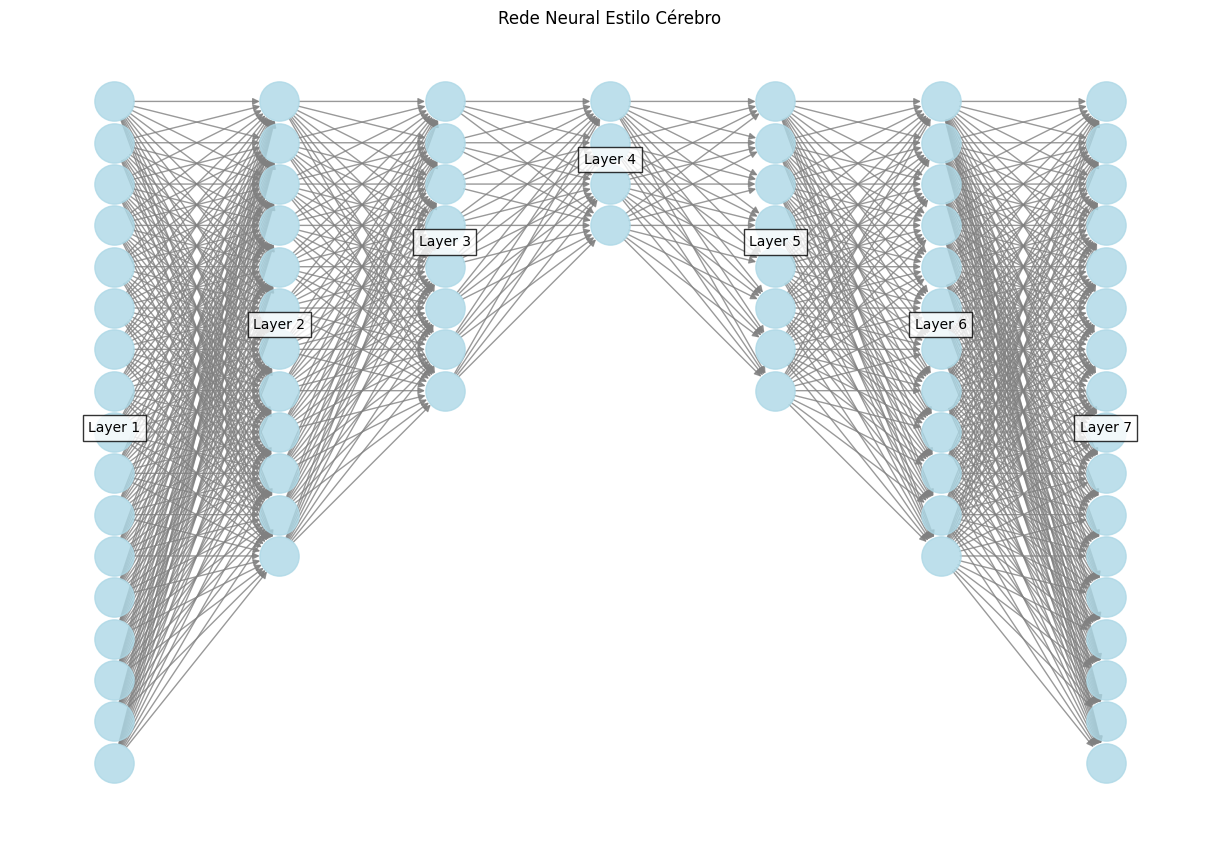

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network_autoencoder(input_dim, architecture):
    """
    Gera um gráfico visual de uma rede neural estilo cérebro.

    Parâmetros:
    - input_dim: Número de neurônios na camada de entrada (número de features).
    - architecture: Lista com o número de neurônios em cada camada.
    """
    G = nx.DiGraph()  # Criar um grafo direcionado

    # Configurações de layout
    layer_positions = {}
    x_offset = 0  # Espaçamento horizontal entre camadas
    y_spacing = 1  # Espaçamento vertical entre neurônios

    # Criar os nós para cada camada
    prev_layer_nodes = []
    for layer_idx, neurons in enumerate(architecture):
        layer_nodes = []
        for neuron_idx in range(neurons):
            node_id = f"L{layer_idx}_N{neuron_idx}"
            layer_nodes.append(node_id)
            y_pos = -neuron_idx * y_spacing  # Posição vertical do neurônio
            layer_positions[node_id] = (x_offset, y_pos)

        # Adicionar conexões entre a camada anterior e a atual
        for prev_node in prev_layer_nodes:
            for current_node in layer_nodes:
                G.add_edge(prev_node, current_node)

        # Atualizar os nós da camada anterior e avançar no eixo x
        prev_layer_nodes = layer_nodes
        x_offset += 2  # Avançar no eixo x para a próxima camada

    # Desenhar a rede neural
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos=layer_positions, with_labels=False,
        node_size=800, node_color="lightblue", edge_color="gray", alpha=0.8
    )

    # Adicionar rótulos para as camadas
    for layer_idx, neurons in enumerate(architecture):
        x_pos = layer_positions[f"L{layer_idx}_N0"][0]
        y_pos_top = layer_positions[f"L{layer_idx}_N0"][1]
        y_pos_bottom = layer_positions[f"L{layer_idx}_N{neurons-1}"][1]
        plt.text(
            x_pos, (y_pos_top + y_pos_bottom) / 2, f"Layer {layer_idx + 1}",
            fontsize=10, bbox=dict(facecolor="white", edgecolor="black", alpha=0.8),
            horizontalalignment="center"
        )

    plt.title("Rede Neural Estilo Cérebro")
    plt.axis("off")
    plt.show()

# Arquitetura da rede baseada no seu modelo
input_dim = 17  # Número de neurônios na camada de entrada
architecture = [input_dim, 12, 8, 4, 8, 12, input_dim]  # Rede Autoencoder

# Chamar a função para plotar a rede neural
plot_neural_network_autoencoder(input_dim, architecture)


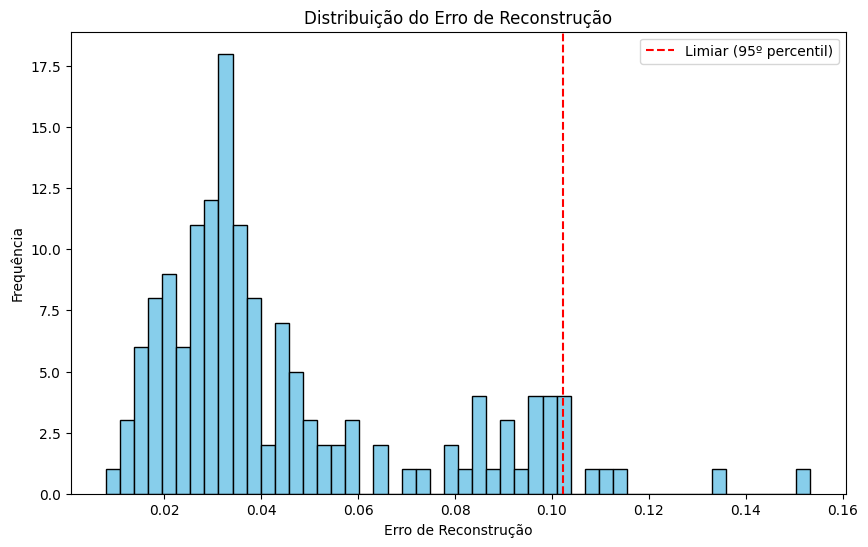

In [33]:
import matplotlib.pyplot as plt

# Plotar o histograma do erro de reconstrução
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color="skyblue", edgecolor="black")
plt.axvline(x=threshold, color="red", linestyle="--", label="Limiar (95º percentil)")
plt.title("Distribuição do Erro de Reconstrução")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.legend()
plt.show()


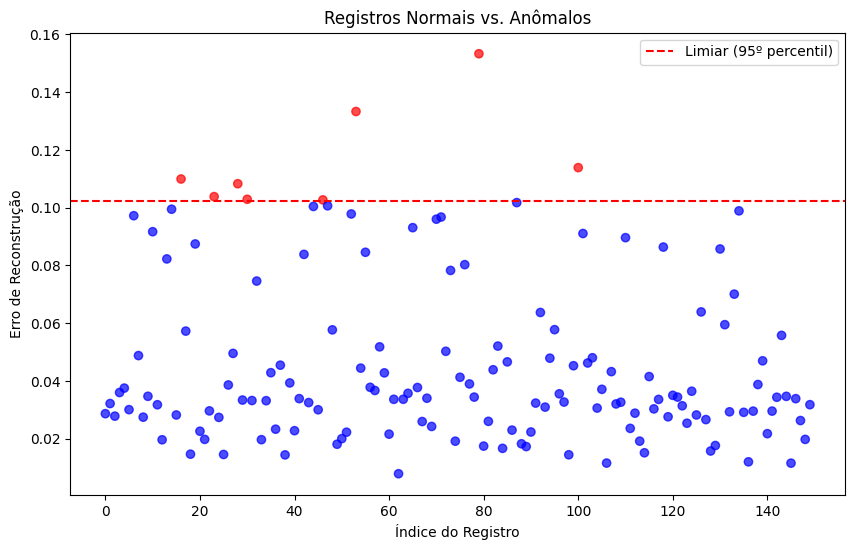

In [34]:
# Marcar registros normais e anômalos
labels = ["Normal" if x <= threshold else "Anômalo" for x in reconstruction_error]

# Criar um scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstruction_error)), reconstruction_error, c=["blue" if l == "Normal" else "red" for l in labels], alpha=0.7)
plt.axhline(y=threshold, color="red", linestyle="--", label="Limiar (95º percentil)")
plt.title("Registros Normais vs. Anômalos")
plt.xlabel("Índice do Registro")
plt.ylabel("Erro de Reconstrução")
plt.legend()
plt.show()


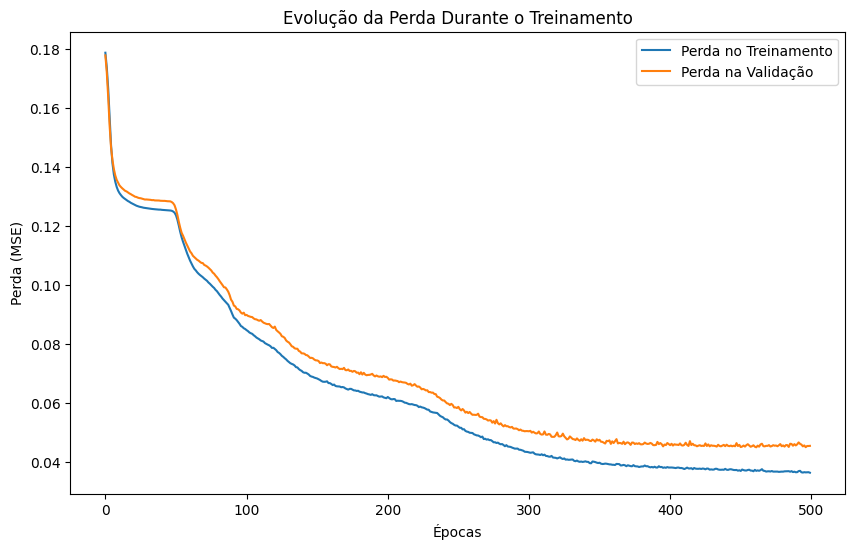

In [35]:
# Plotar a perda no treinamento e validação
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Perda no Treinamento")
plt.plot(history.history["val_loss"], label="Perda na Validação")
plt.title("Evolução da Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda (MSE)")
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


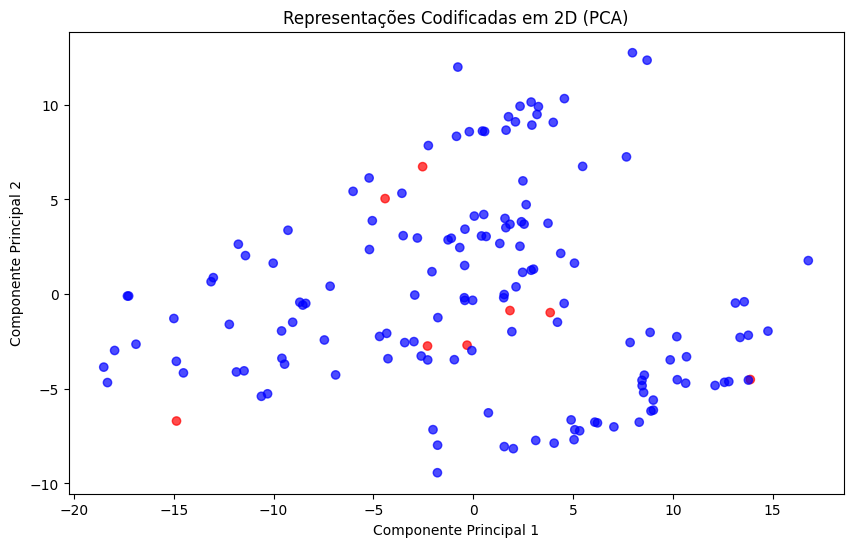

In [36]:
from sklearn.decomposition import PCA

# Extrair as representações comprimidas
encoder_model = Model(inputs=autoencoder.input, outputs=encoder)
compressed_data = encoder_model.predict(X_val)

# Reduzir as dimensões para 2D usando PCA
pca = PCA(n_components=2)
compressed_2d = pca.fit_transform(compressed_data)

# Criar scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(compressed_2d[:, 0], compressed_2d[:, 1], c=["red" if x > threshold else "blue" for x in reconstruction_error], alpha=0.7)
plt.title("Representações Codificadas em 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


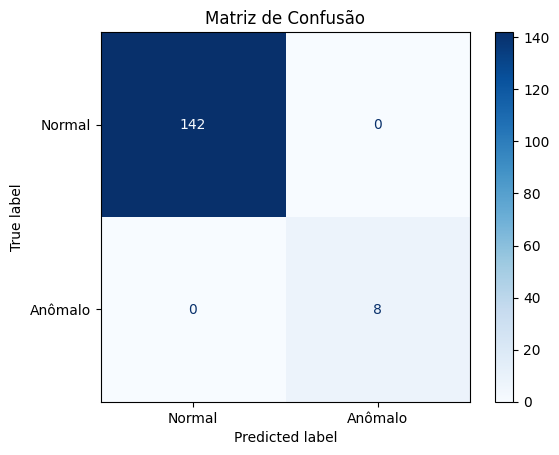

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponha que você tenha labels verdadeiras (0 = Normal, 1 = Anômalo)
true_labels = [0 if x <= threshold else 1 for x in reconstruction_error]  # Exemplo de labels reais
predicted_labels = [0 if x <= threshold else 1 for x in reconstruction_error]

# Criar a matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()
